In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Netflix.csv")

In [ ]:
df.head(5)

In [ ]:
df = df.drop(columns=["duration"])

In [ ]:
df.head(5)

In [ ]:
# Preencher os valores perdidos com Unknown
df["director"] = df["director"].fillna("Unknown")
df["cast"] = df["cast"].fillna("Unknown")
df["country"] = df["country"].fillna("Unknown")
df["genres"] = df["genres"].fillna("Unknown")
df["description"] = df["description"].fillna("No description")

# Converter data e lidar com possíveis erros
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")

In [ ]:
df.info()

In [ ]:
df["type"] = df["type"].astype("category")
df["language"] = df["language"].astype("category")
df['genres'] = df['genres'].str.split(',').apply(
    lambda x: [genre.strip() for genre in x] if isinstance(x, list) else []
)

In [ ]:
df.head(10)

In [ ]:
df['type'].value_counts(normalize=True)

In [ ]:
df['year_added'] = df['date_added'].dt.year
yearly_additions = df.groupby('year_added').size()

In [ ]:
df.isnull().sum()

In [ ]:
df['country'] = df['country'].str.split(',').str[0]

In [ ]:
if 'release_year' in df.columns:
    df['decade'] = (df['release_year']//10)*10

In [ ]:
genre_series = df['genres'].dropna().apply(lambda x: [genre.strip() for genre in x])

In [ ]:
genre_series

In [14]:
all_genres = genre_series.explode()

In [ ]:
all_genres

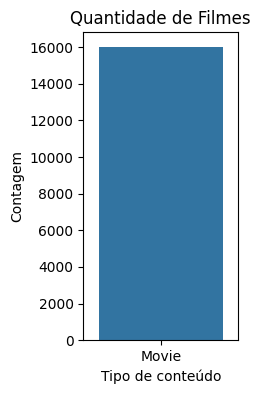

In [7]:
plt.figure(figsize=(2,4))
sns.countplot(data=df, x='type')
plt.title("Quantidade de Filmes")
plt.xlabel("Tipo de conteúdo")
plt.ylabel("Contagem")
plt.show()

In [16]:
top_genres = all_genres.value_counts().head(10)

C:\Users\Joana\AppData\Local\Temp\ipykernel_3400\1742250737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")


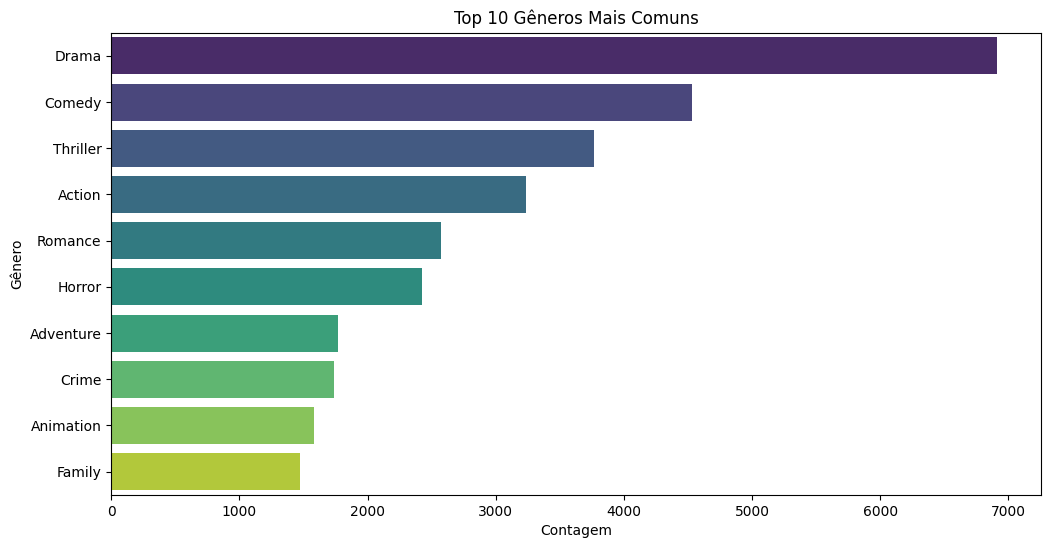

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")
plt.title("Top 10 Gêneros Mais Comuns")
plt.xlabel("Contagem")
plt.ylabel("Gênero")
plt.show()

In [20]:
movies_df = df[df['type'] == 'Movie'].dropna(subset=['revenue'])

In [21]:
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')

In [22]:
top_revenue = movies_df.sort_values(by='revenue', ascending=False).head(10)

C:\Users\Joana\AppData\Local\Temp\ipykernel_3400\1484463001.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='title', data=top_revenue, palette="crest")


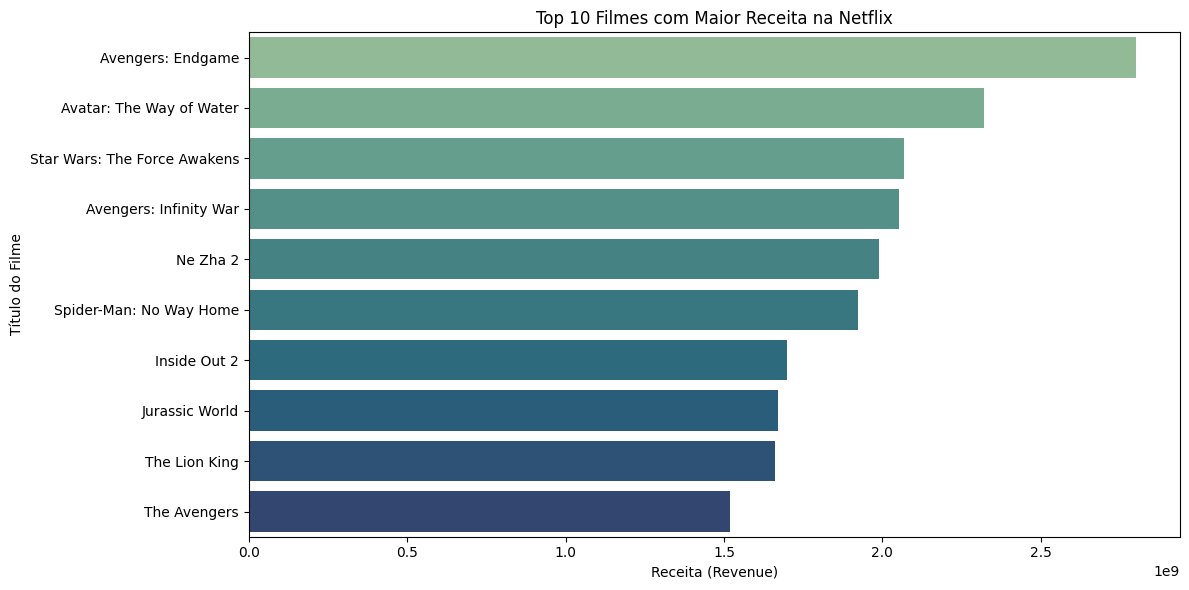

In [23]:
plt.figure(figsize=(12,6))
sns.barplot(x='revenue', y='title', data=top_revenue, palette="crest")
plt.title("Top 10 Filmes com Maior Receita na Netflix")
plt.xlabel("Receita (Revenue)")
plt.ylabel("Título do Filme")
plt.tight_layout()
plt.show()

In [25]:
popular_movies = df[df['type'] == 'Movie'].dropna(subset=['popularity'])

In [26]:
popular_movies['popularity'] = pd.to_numeric(popular_movies['popularity'], errors='coerce')

In [27]:
top_popular = popular_movies.sort_values(by='popularity', ascending=False).head(10)

C:\Users\Joana\AppData\Local\Temp\ipykernel_3400\2112751104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='title', data=top_popular, palette="rocket")


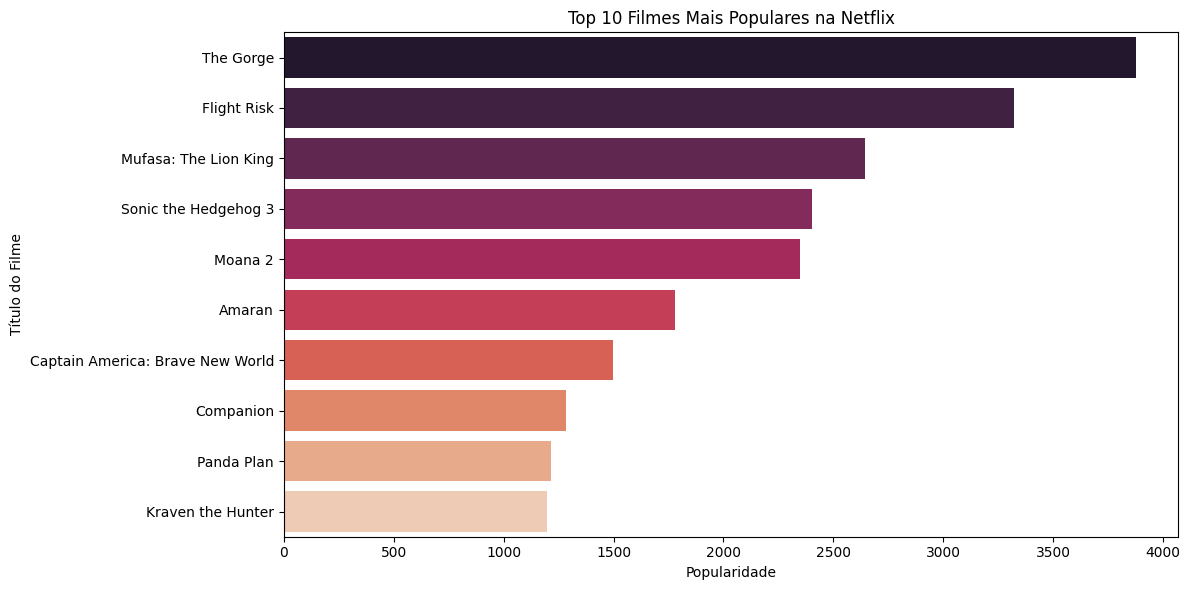

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x='popularity', y='title', data=top_popular, palette="rocket")
plt.title("Top 10 Filmes Mais Populares na Netflix")
plt.xlabel("Popularidade")
plt.ylabel("Título do Filme")
plt.tight_layout()
plt.show()

In [29]:
rated_movies = df[df['type'] == 'Movie'].dropna(subset=['rating'])

In [30]:
rated_movies['rating'] = pd.to_numeric(rated_movies['rating'], errors='coerce')

In [31]:
top_rated = rated_movies.sort_values(by='rating', ascending=False).head(10)

In [33]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,language,description,popularity,vote_count,vote_average,budget,revenue
0,10192,Movie,Shrek Forever After,Mike Mitchell,"Mike Myers, Eddie Murphy, Cameron Diaz, Antoni...",United States of America,2010-05-16,2010,6.380,NaN,"Comedy, Adventure, Fantasy, Animation, Family",en,A bored and domesticated Shrek pacts with deal...,203.893,7449,6.380,165000000,752600867
1,27205,Movie,Inception,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ken W...","United Kingdom, United States of America",2010-07-15,2010,8.369,NaN,"Action, Science Fiction, Adventure",en,"Cobb, a skilled thief who commits corporate es...",156.242,37119,8.369,160000000,839030630
2,12444,Movie,Harry Potter and the Deathly Hallows: Part 1,David Yates,"Daniel Radcliffe, Emma Watson, Rupert Grint, T...","United Kingdom, United States of America",2010-11-17,2010,7.744,NaN,"Adventure, Fantasy",en,"Harry, Ron and Hermione walk away from their l...",121.191,19327,7.744,250000000,954305868
3,38757,Movie,Tangled,"Byron Howard, Nathan Greno","Mandy Moore, Zachary Levi, Donna Murphy, Ron P...",United States of America,2010-11-24,2010,7.600,NaN,"Animation, Family, Adventure",en,"Feisty teenager Rapunzel, who has long and mag...",111.762,11638,7.600,260000000,592461732
4,10191,Movie,How to Train Your Dragon,"Chris Sanders, Dean DeBlois","Jay Baruchel, Gerard Butler, Craig Ferguson, A...",United States of America,2010-03-18,2010,7.800,NaN,"Fantasy, Adventure, Animation, Family",en,As the son of a Viking leader on the cusp of m...,110.044,13259,7.800,165000000,494879471
5,11324,Movie,Shutter Island,Martin Scorsese,"Leonardo DiCaprio, Mark Ruffalo, Ben Kingsley,...",United States of America,2010-02-14,2010,8.200,NaN,"Drama, Thriller, Mystery",en,World War II soldier-turned-U.S. Marshal Teddy...,101.551,24282,8.200,80000000,294804195
6,38575,Movie,The Karate Kid,Harald Zwart,"Jaden Smith, Jackie Chan, Taraji P. Henson, We...","China, Hong Kong, United States of America",2010-06-10,2010,6.500,NaN,"Action, Adventure, Drama, Family",en,Twelve-year-old Dre Parker could have been the...,96.385,6082,6.500,40000000,359126022
7,10138,Movie,Iron Man 2,Jon Favreau,"Robert Downey Jr., Gwyneth Paltrow, Don Cheadl...",United States of America,2010-04-28,2010,6.800,NaN,"Adventure, Action, Science Fiction",en,With the world now aware of his dual life as t...,95.255,21222,6.800,200000000,623933331
8,38365,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States of America,2010-06-24,2010,6.394,NaN,Comedy,en,After their high school basketball coach passe...,93.281,6212,6.394,80000000,271430189
9,48650,Movie,Room in Rome,Julio Medem,"Elena Anaya, Natasha Yarovenko, Enrico Lo Vers...","France, Spain",2010-05-07,2010,6.416,NaN,"Drama, Romance",es,A hotel room in the center of Rome serves as t...,90.230,748,6.416,0,844281
